In [3]:
from sklearn import linear_model
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_brain = pd.read_csv("./../data/headbrain.csv", skiprows=1, 
                      names=['gender','age_range' , 'head_size', 'brain_weight'])

df_brain.describe()

,gender,age_range,head_size,brain_weight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [5]:
df_brain.dtypes

gender          int64
age_range       int64
head_size       int64
brain_weight    int64
dtype: object

In [6]:
df_brain.head()

,gender,age_range,head_size,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


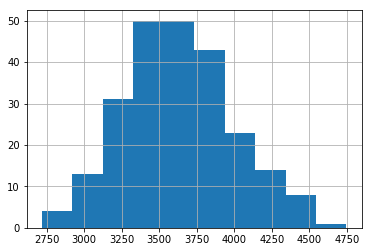

In [7]:
df_brain.head_size.hist()

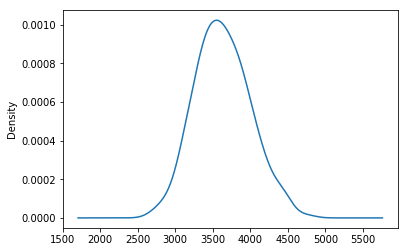

In [8]:
df_brain.head_size.plot.kde()

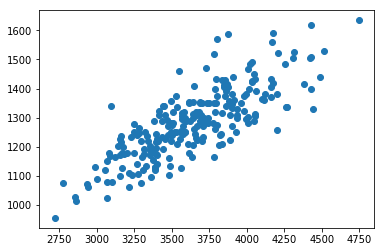

In [9]:
plt.scatter(df_brain.head_size, df_brain.brain_weight)

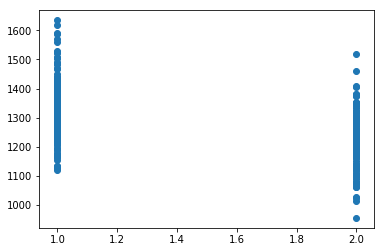

In [10]:
plt.scatter(df_brain.gender, df_brain.brain_weight)

C:\Users\Romain\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


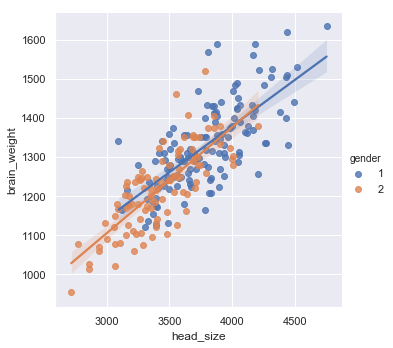

In [11]:
import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="head_size", y="brain_weight", hue="gender",
               truncate=True, height=5, data=df_brain)

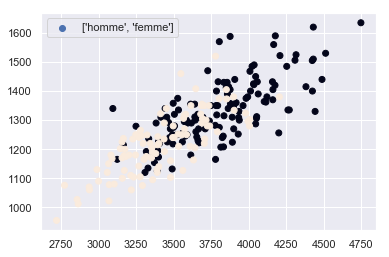

In [13]:
class_mapping_2 = {v:k for k,v in dict(enumerate(df_brain.gender.unique())).items()}

plt.scatter(df_brain.head_size.tolist(), 
            df_brain.brain_weight.tolist(),
            c=df_brain.gender.apply(lambda x: class_mapping_2[x]).tolist(), 
           label=['homme', 'femme'])

plt.legend()

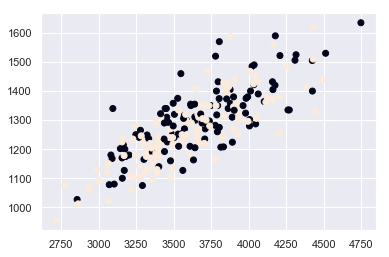

In [14]:
class_mapping_3 = {v:k for k,v in dict(enumerate(df_brain.age_range.unique())).items()}

plt.scatter(df_brain.head_size.tolist(), 
            df_brain.brain_weight.tolist(),
            c=df_brain.age_range.apply(lambda x: class_mapping_3[x]).tolist())

In [15]:
df_brain.cov()

,gender,age_range,head_size,brain_weight
gender,0.246764,-0.022009,-93.271741,-27.813398
age_range,-0.022009,0.249768,-19.245459,-10.190356
head_size,-93.271741,-19.245459,133415.906708,35145.664182
brain_weight,-27.813398,-10.190356,35145.664182,14481.822892


In [16]:
df_brain.corr()

,gender,age_range,head_size,brain_weight
gender,1.000000,-0.088652,-0.514050,-0.465266
age_range,-0.088652,1.000000,-0.105428,-0.169438
head_size,-0.514050,-0.105428,1.000000,0.799570
brain_weight,-0.465266,-0.169438,0.799570,1.000000


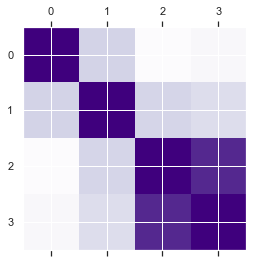

In [18]:
plt.matshow(df_brain.corr(), cmap=plt.cm.Purples)

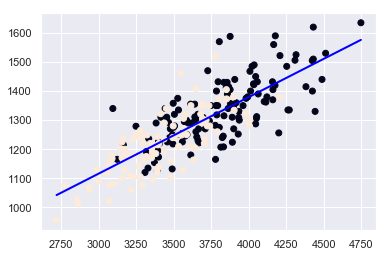

In [19]:
plt.scatter(df_brain.head_size.tolist(), 
            df_brain.brain_weight.tolist(),
            c=df_brain.gender.apply(lambda x: class_mapping_2[x]).tolist())

regr = linear_model.LinearRegression()
regr.fit(df_brain.head_size[:,np.newaxis], df_brain.brain_weight)

x_test = np.linspace(np.min(df_brain.head_size), np.max(df_brain.head_size), 100)

plt.plot(x_test, regr.predict(x_test[:,np.newaxis]), color='blue', linewidth=2)

plt.show()

In [20]:
print('slope', regr.coef_)
print('intercept', regr.intercept_)

slope [0.26342934]
intercept 325.5734210494428
